In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.dpi']=150
import seaborn as sns

In [35]:
df = pd.read_excel('Main.ods',engine='odf')
allowedStates = ['Bulk','Cut','Main']
df = df[df['State'].isin(allowedStates)]   
df = df.convert_dtypes()
df = df.replace('NoName',np.nan)
df = df.replace(0, np.nan)
df['Date']=pd.to_datetime(df['Date'])
df.tail()

,Date,State,ProgName,Chest,Delts,Traps,Lats,Tris,Bis,Forearms,Quads,Hams,Calves,Abs,Neck
51,2022-04-16,Main,gentleman,3400.0,1892.0,7083.0,5592.0,3870.0,3456.0,5396.0,<NA>,<NA>,7260,1585,1700
52,2022-04-18,Main,gentleman,4425.0,2652.0,8485.0,10350.0,5537.5,5835.0,1120.0,<NA>,<NA>,11475,1056,1740
53,2022-04-19,Main,gentleman,<NA>,<NA>,2640.0,2568.0,<NA>,<NA>,1284.0,8190.0,7862.5,7326,2607,1760
54,2022-04-20,Main,gentleman,4925.0,3312.0,1620.0,2592.0,6958.75,3336.0,4000.0,<NA>,<NA>,8175,1892,1410
55,2022-04-21,Main,gentleman,<NA>,<NA>,9825.0,10877.0,<NA>,2800.0,8152.5,6120.0,6210.0,<NA>,1626,<NA>


In [36]:
def betterMean(column):
    if pd.api.types.is_numeric_dtype(column):
        return column.sum()
    else:
        return column.value_counts().idxmax() #if column.nunique()==1 else np.nan
        
weekly_df = df.copy()
weekly_df['Date'] = pd.to_datetime(weekly_df['Date']) - pd.to_timedelta(7, unit='d')
weekly_df = weekly_df.groupby(pd.Grouper(key='Date', freq='W-MON')).agg(betterMean)

roll_df = df.set_index('Date').replace(0,np.nan)
roll_df.iloc[:,2:]= roll_df.iloc[:,2:].astype(float).rolling(window='7d').mean()


In [37]:
df.tail()

,Date,State,ProgName,Chest,Delts,Traps,Lats,Tris,Bis,Forearms,Quads,Hams,Calves,Abs,Neck
51,2022-04-16,Main,gentleman,3400.0,1892.0,7083.0,5592.0,3870.0,3456.0,5396.0,<NA>,<NA>,7260,1585,1700
52,2022-04-18,Main,gentleman,4425.0,2652.0,8485.0,10350.0,5537.5,5835.0,1120.0,<NA>,<NA>,11475,1056,1740
53,2022-04-19,Main,gentleman,<NA>,<NA>,2640.0,2568.0,<NA>,<NA>,1284.0,8190.0,7862.5,7326,2607,1760
54,2022-04-20,Main,gentleman,4925.0,3312.0,1620.0,2592.0,6958.75,3336.0,4000.0,<NA>,<NA>,8175,1892,1410
55,2022-04-21,Main,gentleman,<NA>,<NA>,9825.0,10877.0,<NA>,2800.0,8152.5,6120.0,6210.0,<NA>,1626,<NA>


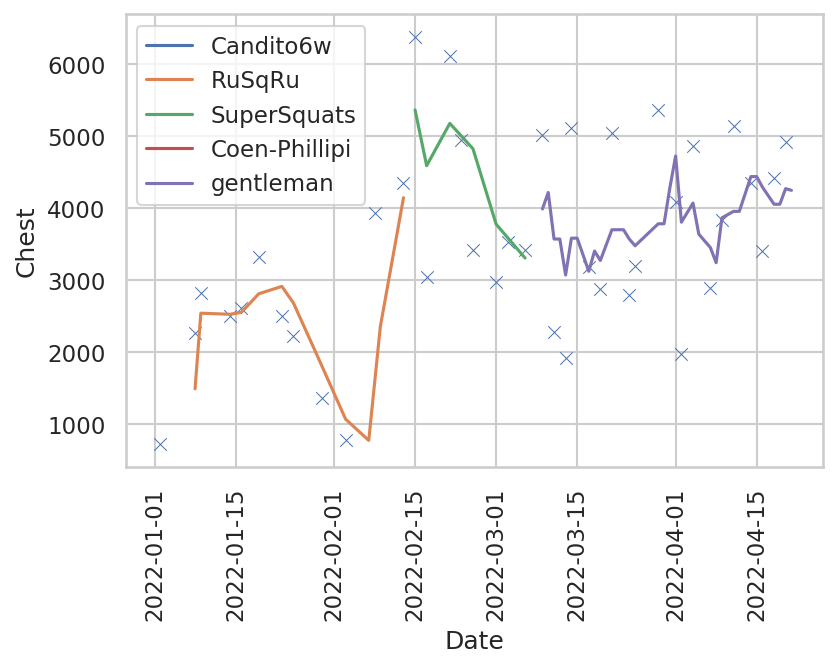

In [38]:
yname = 'Chest'
sns.lineplot(x='Date',y=yname,data=roll_df,hue='ProgName')
#sns.lineplot(x='Date',y=yname,data=roll_df)
#sns.scatterplot(x='Date',y=yname,data=roll_df,hue='ProgName',marker='x')
sns.scatterplot(x='Date',y=yname,data=df,marker='x')
sns.set_theme(style='whitegrid')
plt.xticks(rotation=90)
plt.show()

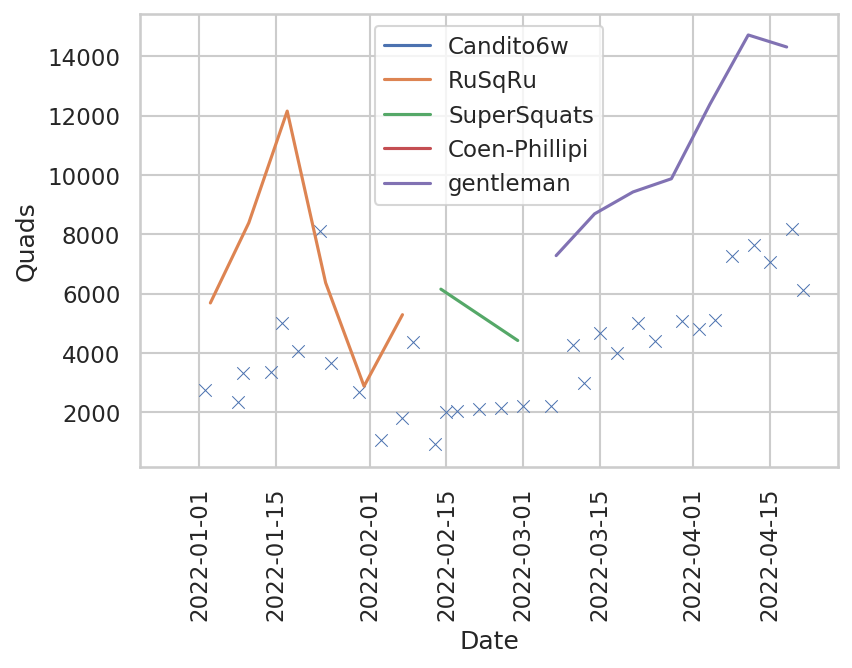

In [39]:
yname = 'Quads'
sns.lineplot(x='Date',y=yname,data=weekly_df,hue='ProgName')
#sns.lineplot(x='Date',y=yname,data=roll_df)
#sns.scatterplot(x='Date',y=yname,data=roll_df,hue='ProgName',marker='x')
sns.scatterplot(x='Date',y=yname,data=df,marker='x')
sns.set_theme(style='whitegrid')
plt.xticks(rotation=90)
plt.show()

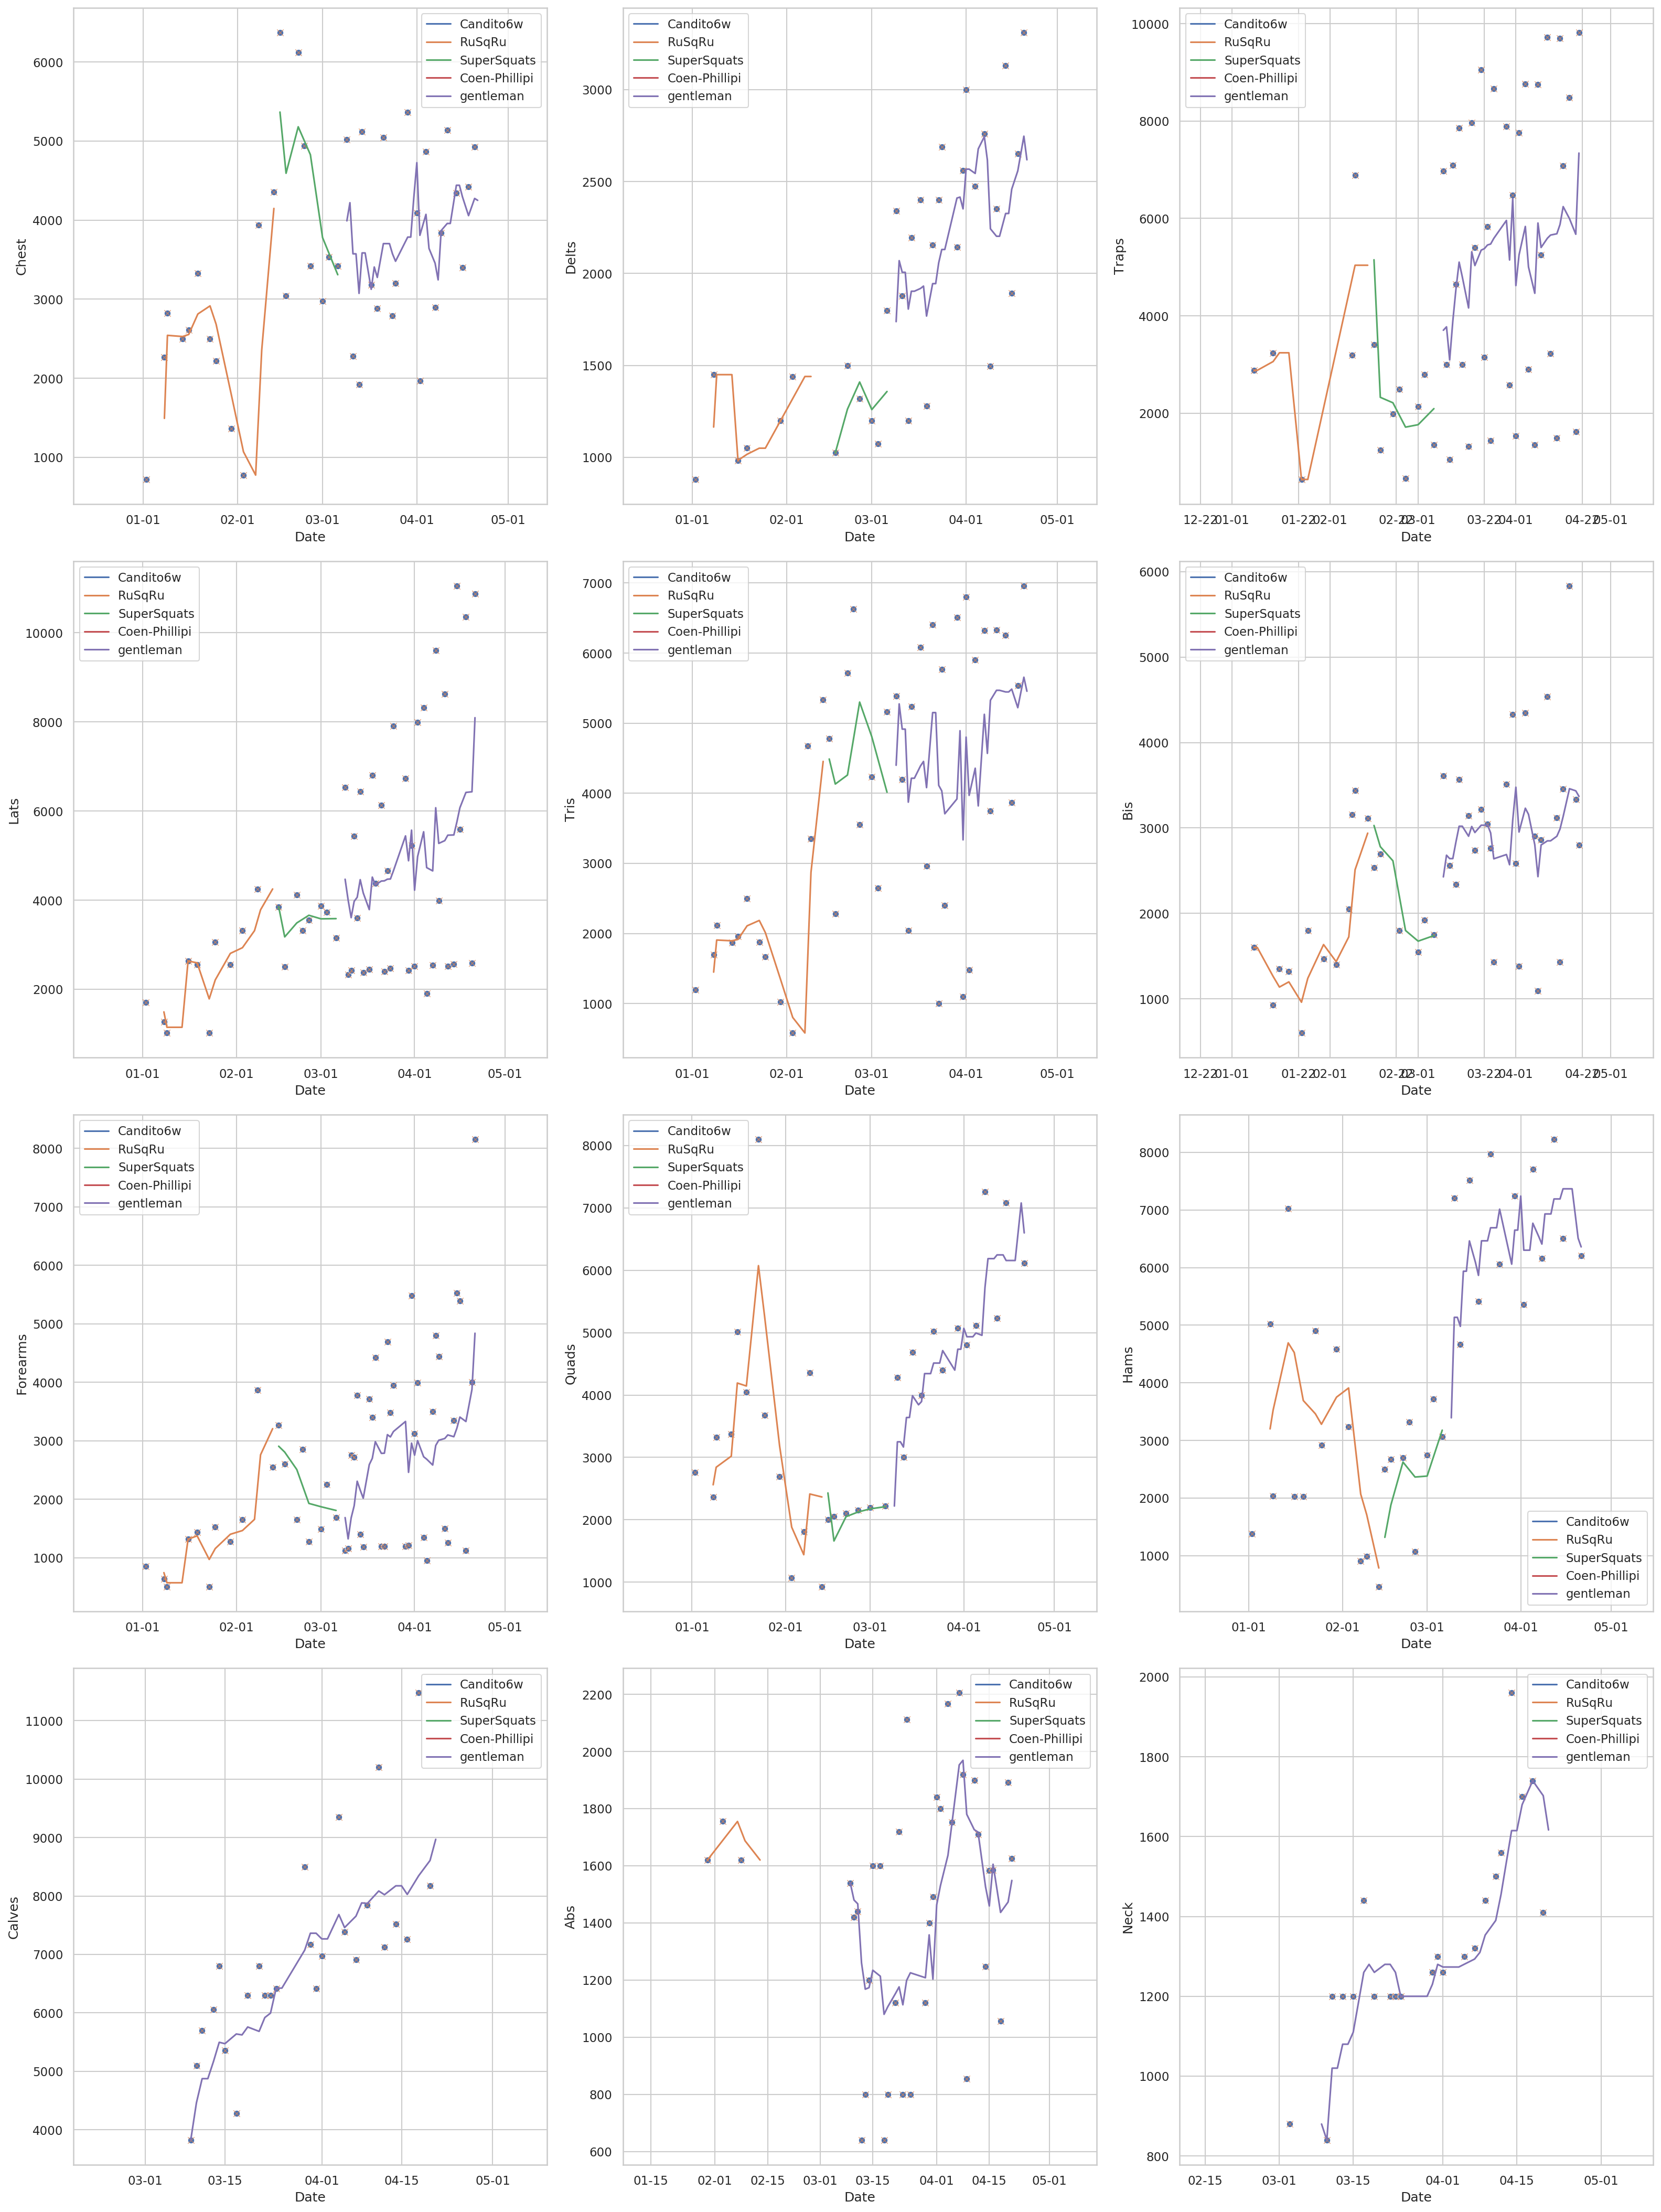

In [18]:
categorical_vars = df.columns[3:]

num_plots = len(categorical_vars)
total_cols = 3
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.scatterplot(x='Date', y=var, data=df, ax=axs[row][pos])
    sns.lineplot(x='Date',y=var,data=roll_df, hue='ProgName', ax=axs[row][pos])
    #sns.scatterplot(x='Date',y=var,data=weekly_df,hue='ProgName', ax=axs[row][pos])
    sns.scatterplot(x='Date',y=var,data=df,marker='x', ax=axs[row][pos])
    axs[row][pos].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    #axs[row][pos].set_xticklabels(rotate=45)

plt.show()